In [1]:
pip install langgraph 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END

def mock_llm(state: MessagesState):
    return {"messages": [{"role": "ai", "content": "hello world"}]}

graph = StateGraph(MessagesState)
graph.add_node(mock_llm)
graph.add_edge(START, "mock_llm")
graph.add_edge("mock_llm", END)
graph = graph.compile()

graph.invoke({"messages": [{"role": "user", "content": "hi!"}]})

{'messages': [HumanMessage(content='hi!', additional_kwargs={}, response_metadata={}, id='d7517e11-65db-4605-a784-641089dff607'),
  AIMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='9fbcc8e1-c6e3-4c86-9de5-c24b9e83a3e1')]}

In [2]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [8]:
pip install -U langchain-google-genai

  Using cached langchain_google_genai-3.0.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached grpcio-1.76.0-cp312-cp312-win_amd64.whl.metadata (3.8 kB)
  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached protobuf-6.33.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached googleapis_common_protos-1.71.0-py3-none-any.whl.metadata (9.4 kB)
  Using cached grpcio_status-1.76.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached cachetools-6.2.1-py3-none-any.whl.metadata (5.5 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- --


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [14]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [15]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [16]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

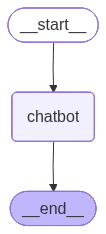

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
pip install langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage,AnyMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode


In [20]:
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [21]:
input={"messages":["hi, my name is nikhil"]}
app.invoke(input)


{'messages': [HumanMessage(content='hi, my name is nikhil', additional_kwargs={}, response_metadata={}, id='0e48c269-7b7b-44c7-bb7e-0c573d2b7595'),
  AIMessage(content="Hi Nikhil! Nice to meet you.\n\nI'm a large language model, here to help you with whatever you need. How can I assist you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--49883839-d725-46a0-baf1-439c573036df-0', usage_metadata={'input_tokens': 8, 'output_tokens': 232, 'total_tokens': 240, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 199}})]}

In [22]:
@tool
def search(query: str):
    """this is my custom tool"""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "it's 60 degrees and foggy"
    return "it is 90 degrees and sunny"


In [43]:
search.invoke("what is a temperature in sf")

"it's 60 degrees and foggy"

In [44]:
search.invoke('your_search_tool')

'it is 90 degrees and sunny'

In [25]:
search

StructuredTool(name='search', description='this is my custom tool', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002187DFB3920>)

In [26]:
tools=[search]

In [27]:
tool_node=ToolNode(tools)

In [45]:
llm_with_tool=llm.bind_tools(tools)
tool_node = ToolNode(tools)

In [46]:
def call_model(state: MessagesState):
    messages=state['messages']
    response=llm_with_tool.invoke(messages)
    return {"messages":[response]}

In [47]:
response=call_model({"messages": ["what is a weather in India"]})

In [49]:
response

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "weather in India"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--52908aec-5b2d-4272-9eaf-fb6c0a4c2c74-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': '067a2ec7-cd05-479f-9675-fff6f2100c29', 'type': 'tool_call'}], usage_metadata={'input_tokens': 42, 'output_tokens': 56, 'total_tokens': 98, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 41}})]}

In [ ]:
messages = response['messages']
last_message=messages[-1]
response=call_model({"messages": ["what is a weather in India?"]})
response
messages = response['messages']
last_message=messages[-1]
last_message.tool_calls#is likely a property/method that extracts tool calls from the last message in the conversation history

[{'name': 'search',
  'args': {'query': 'weather in India'},
  'id': 'c322258e-d65a-49e2-bf25-bef000d75d2b',
  'type': 'tool_call'}]